
Title: Support Vector Regressor for Property Prediction
=======
- Created: 2019.11.06
- Updated: 2019.11.13
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents
  - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
  - https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
- https://www.slideshare.net/freepsw/svm-77055058
- https://datascienceschool.net/view-notebook/69278a5de79449019ad1f51a614ef87c/
- https://blog.naver.com/PostView.nhn?blogId=someonenice&logNo=10135104816&proxyReferer=https%3A%2F%2Fwww.google.com%2F


## Support Vector Regression. 

- The free parameters in the model are C and epsilon.
- 서포트 벡터 머신은 반응변수가 연속형인 경우에도 적용 가능, 반응변수가 연속형인 경우에는 회귀분석과 유사한 결과로 나타남 , 
- 서로 다른 분류에 속한 관측치 사이에 간격이 최대가 되는 선을 찾아 이것을 선으로 연결한 것으로 바이너리한 값이 아니라 연속된 수치로 예측이 가능함
- 분석방법은 SVM의 경우와 동일함

> class sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)[source]

HyperParameters
---


- **kernel**[string, optional (default=’rbf’)]: Specifies the kernel type to be used in the algorithm. 
  - It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

- **degree**[int, optional (default=3)]: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

- **gamma**[float, optional (default=’auto’)]: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
  - Current default is ‘auto’ which uses $\frac{1}{n_features}$
  - if gamma='scale' is passed then it uses $\frac{1}{(n_features * X.var())}$ as value of gamma. 
  ![kenrnal](https://s0.wp.com/latex.php?latex=k_%7Brbf%7D%28x_1%2C+x_2%29+%3D+exp%28-%5Cgamma%7C%7Cx_1+-+x_2%7C%7C%5E2%29&bg=ffffff&fg=444444&s=0)
    - $\gamma$ is controlling the width of Gaussian kernal.
    - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정합니다. 작은 값은 넓은 영역을 의미하며 큰 값일 경우 영향이 미치는 범위가 제한적입니다. 다른 말로 하면, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커집니다. 
    - 작은 gamma 값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려됩니다. 그래서 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해집니다. 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춥니다. 반면에 큰 gamma 값은 더 복잡한 모델을 만듭니다.
   
    
- **coef0**[float, optional (default=0.0)]: Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

- **tol**[float, optional (default=1e-3)]: Tolerance for stopping criterion.

- **C**[float, optional (default=1.0)]: Penalty parameter C of the error term.
  - C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수입니다. 이 매개변수는 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한합니다.
  - 선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작습니다. 왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않습니다.
   - The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM.
  
- **epsilon**[float, optional (default=0.1)]: Epsilon in the epsilon-SVR model. 
  - It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

- **shrinking**[boolean, optional (default=True)]: Whether to use the shrinking heuristic.

- **cache_size**[float, optional]: Specify the size of the kernel cache (in MB).

- **verbose**[bool, default: False]:Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

- **max_iter**[int, optional (default=-1)]: Hard limit on iterations within solver, or -1 for no limit.

Explanation of SVM
---
커널 서포트 벡터 머신은 강력한 모델이며 다양한 데이터셋에서 잘 작동합니다. SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있습니다. 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않습니다. 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제입니다.

SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점입니다. 그래서 요즘엔 사람들 대부분이 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용합니다. 더군다나 SVM 모델은 분석하기도 어렵습니다. 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해합니다.

하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만합니다.
![svm parameter](https://image.slidesharecdn.com/svmv0-170619005336/95/svm-21-638.jpg?cb=1497833721)
커널 SVM에서 중요한 매개변수는 규제 매개변수 C이고 어떤 커널을 사용할지와 각 커널에 따른 매개변수입니다. 우리는 RBF 커널만 살펴봤지만 scikit-learn에는 다른 커널도 많습니다. 6 RBF 커널은 가우시안 커널 폭의 역수인 gamma 매개변수 하나를 가집니다. 7 gamma와 C 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듭니다. 그러므로 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정해야 합니다.
![choosing kernel](https://image.slidesharecdn.com/svmv0-170619005336/95/svm-22-1024.jpg?cb=1497833721)

출처: https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/

#### Scikit-learn의 커널 SVM

- kernel = "linear": 선형 SVM.  $ k(x_1, x_2) = x^T_1 x_2 $
- kernel = "poly": 다항 커널.  $ k(x_1, x_2) = (\gamma(x^T_1 x_2) + \theta)^d $
  - gamma:  γ 
  - coef0:  θ 
  - degree:  d 
- kernel = "rbf" 또는 kernel = None: RBF 커널.  $ k(x_1, x_2) = exp(-\gamma ||x_1 - x_2||^2)  $
  - gamma:  γ 
- kernel = "sigmoid": 시그모이드 커널.  $ k(x_1, x_2) = tanh(\gamma(x^T_1 x_2) + \theta)$
  - gamma:  γ 
  - coef0:  θ

Attributes
---


- **fit(self, X, y[, sample_weight])**: Fit the SVM model according to the given training data.
- **get_params(self[, deep])**: Get parameters for this estimator.
- **predict(self, X)**:	Perform regression on samples in X.
- **score(self, X, y[, sample_weight])**: Returns the coefficient of determination R^2 of the prediction.
- **set_params(self, \*\*params)**:	Set the parameters of this estimator.

Setup
---

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

"""
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "yield stress"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
"""

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
sklearn.__version__

'0.21.3'

Get the data
============

In [3]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data.csv
User uploaded file"3MA_data.csv" with length30235 bytes


In [85]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df.head()


,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),2k_RE,2k_IM,2k_time,2k_voltage,5k_RE,5k_IM,5k_time,5k_voltage
0,0.000000,0.000000,2.247535,7.353994,-0.617027,412.0,8.101315,-0.001526,0.0,5.336142,8.103753,0.048710,0.0,5.330770
1,75.892467,7.832161,2.249186,7.330924,-0.934697,412.0,8.132672,0.148338,3.2,5.338889,8.084683,0.057399,3.2,5.329357
2,161.088251,7.825444,2.248753,7.367316,-0.574723,412.0,8.101563,0.136901,6.4,5.337461,8.099559,0.125401,6.4,5.331381
3,177.021266,7.813692,2.249833,7.345533,-0.862965,412.0,8.110379,0.107394,9.6,5.335226,8.103011,0.153286,9.6,5.329095
4,182.120781,7.780144,2.247326,7.350974,-0.681030,412.0,8.107994,0.299747,12.8,5.336309,8.122078,0.185302,12.8,5.333564


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
2k_RE           210 non-null float64
2k_IM           210 non-null float64
2k_time         210 non-null float64
2k_voltage      210 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(14)
memory usage: 23.0 KB


2 Variable (1k_RE & 1k_IM) data
---

In [6]:
df = df.loc[:,["yield stress", "elongation", "1k_RE", "1k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 209
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.5 KB


In [7]:
df.describe()

,yield stress,elongation,1k_RE,1k_IM
count,190.000000,190.000000,190.000000,190.000000
mean,329.165639,5.071727,7.184671,-0.994367
std,66.792374,1.598025,0.078204,0.122292
min,0.000000,0.000000,7.076378,-1.220670
25%,294.251701,3.747314,7.121649,-1.065305
50%,346.269052,5.080847,7.162842,-1.015719
75%,380.555745,6.401437,7.245272,-0.922856
max,406.890446,7.832161,7.367316,-0.574723


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca9e83b0f0>,
      dtype=object)

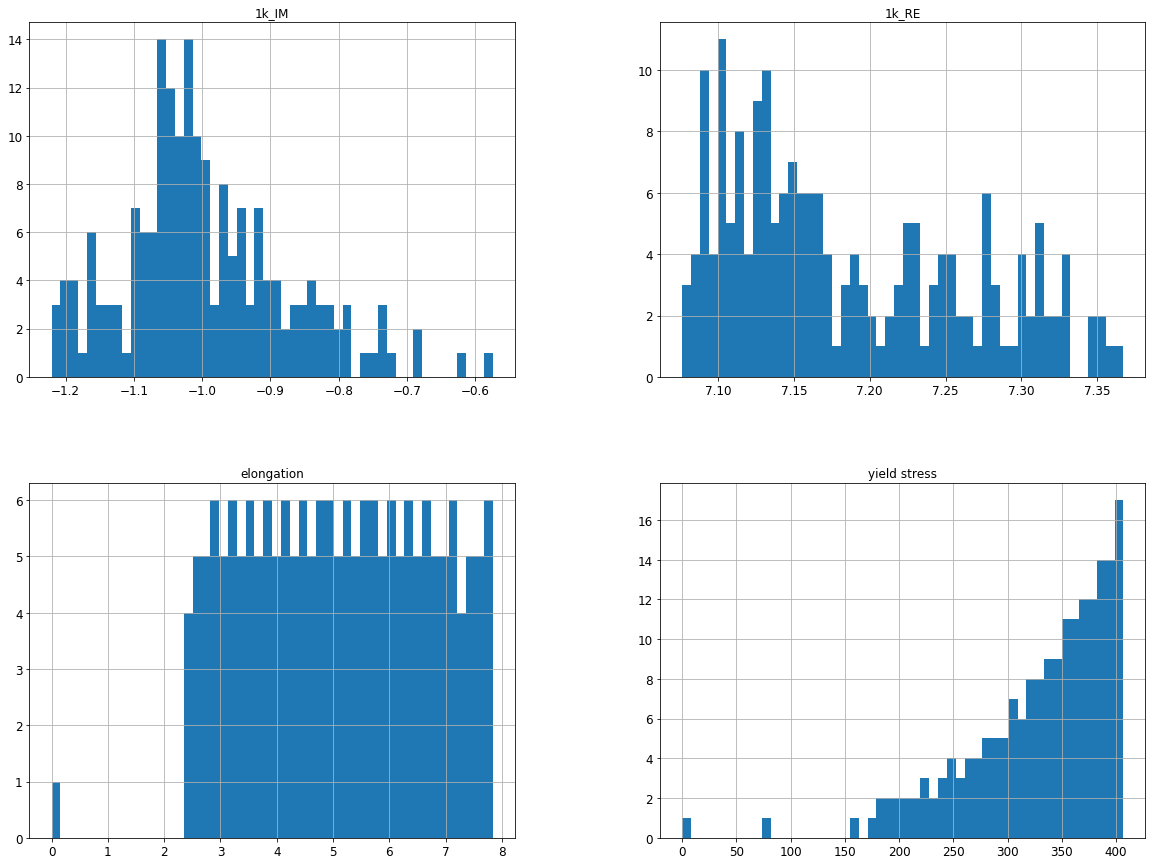

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [10]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [11]:
len(X_test)

39

In [0]:
#X_train.to_csv("X_train.csv", mode='w')

Discover and visualize the data to gain insights
===

In [13]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 209
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.5 KB


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 35 to 102
Data columns (total 2 columns):
1k_RE    151 non-null float64
1k_IM    151 non-null float64
dtypes: float64(2)
memory usage: 3.6 KB


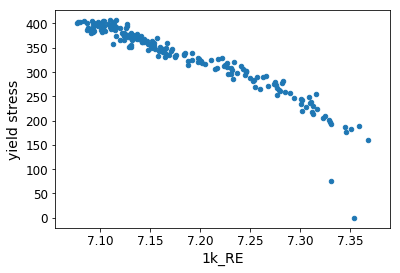

In [15]:
df_copy.plot(kind="scatter", x="1k_RE", y="yield stress")

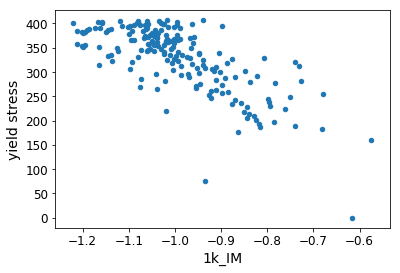

In [16]:
df_copy.plot(kind="scatter", x="1k_IM", y="yield stress")

In [17]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,1k_RE,1k_IM
yield stress,1.000000,-0.776652,-0.947305,-0.726706
elongation,-0.776652,1.000000,0.883247,0.591942
1k_RE,-0.947305,0.883247,1.000000,0.816920
1k_IM,-0.726706,0.591942,0.816920,1.000000


In [18]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)


# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
1k_IM          -0.726706
elongation     -0.776652
1k_RE          -0.947305
Name: yield stress, dtype: float64

In [19]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
1k_RE           0.883247
1k_IM           0.591942
yield stress   -0.776652
Name: elongation, dtype: float64

In [20]:
print(X_train)

        1k_RE     1k_IM
35   7.275967 -0.897505
100  7.130577 -1.163829
55   7.242638 -0.918922
135  7.127862 -0.995553
78   7.174594 -0.974959
95   7.171711 -1.029776
29   7.279347 -0.921136
142  7.130945 -1.037556
51   7.245305 -0.903072
162  7.102419 -1.101962
183  7.079194 -1.157279
31   7.259413 -1.038934
154  7.092637 -1.137819
12   7.312785 -0.839329
41   7.253217 -0.910868
124  7.138559 -1.003155
56   7.214248 -1.096842
119  7.123448 -1.094453
117  7.141808 -1.019309
26   7.315852 -0.679348
38   7.274650 -0.838035
118  7.151657 -1.049820
170  7.092730 -1.076187
104  7.129160 -1.201569
82   7.183574 -0.985725
127  7.134200 -1.039855
2    7.367316 -0.574723
46   7.266073 -0.823381
97   7.162874 -1.008984
109  7.147599 -1.058126
..        ...       ...
58   7.230624 -0.953280
48   7.230754 -0.972286
88   7.163089 -1.024522
21   7.301144 -0.869038
57   7.216858 -0.935602
160  7.087531 -1.163459
184  7.103697 -1.033858
129  7.127348 -1.057862
37   7.281512 -0.782862
157  7.125413 -0

In [21]:
X_train['1k_RE']

35     7.275967
100    7.130577
55     7.242638
135    7.127862
78     7.174594
95     7.171711
29     7.279347
142    7.130945
51     7.245305
162    7.102419
183    7.079194
31     7.259413
154    7.092637
12     7.312785
41     7.253217
124    7.138559
56     7.214248
119    7.123448
117    7.141808
26     7.315852
38     7.274650
118    7.151657
170    7.092730
104    7.129160
82     7.183574
127    7.134200
2      7.367316
46     7.266073
97     7.162874
109    7.147599
         ...   
58     7.230624
48     7.230754
88     7.163089
21     7.301144
57     7.216858
160    7.087531
184    7.103697
129    7.127348
37     7.281512
157    7.125413
180    7.097852
1      7.330924
52     7.245787
149    7.093435
130    7.136154
151    7.114666
103    7.153621
99     7.165844
116    7.146921
87     7.184526
74     7.217584
121    7.119231
209         NaN
20     7.310711
71     7.191166
106    7.131141
14     7.301127
92     7.163972
179    7.086661
102    7.129122
Name: 1k_RE, Length: 152

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [23]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train = imputer.fit_transform(ys_train)
ys_train_std = data_pipeline.fit_transform(ys_train)


el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train = imputer.fit_transform(el_train)
el_train_std = data_pipeline.fit_transform(el_train)

X_test = imputer.fit_transform(X_test)
X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test = imputer.fit_transform(ys_test)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test = imputer.fit_transform(el_test)
el_test_std = data_pipeline.fit_transform(el_test)


#print(X_train_std)

ys_test_std


array([[ 0.89538224],
       [-0.04939316],
       [ 0.95271802],
       [-0.20325483],
       [-0.31581744],
       [-1.73115607],
       [-2.08291738],
       [-1.67897124],
       [ 0.64741109],
       [ 0.61557252],
       [ 0.76539935],
       [ 0.93371604],
       [-1.58063649],
       [ 0.98070605],
       [ 0.46420779],
       [ 1.15411996],
       [ 0.92399393],
       [-0.22081126],
       [ 1.01711315],
       [-0.73212955],
       [-1.09706837],
       [-1.31957121],
       [-0.18504944],
       [ 0.28797548],
       [-0.15007426],
       [ 0.47643691],
       [ 0.26035688],
       [-1.53377299],
       [-0.65327667],
       [-0.0335396 ],
       [ 1.05256465],
       [-0.16704042],
       [-2.34232342],
       [ 0.69149062],
       [ 0.17759992],
       [ 1.00851225],
       [ 0.41618542],
       [ 1.16161328],
       [ 1.19372827]])

In [24]:
ys_train

array([[273.3904667 ],
       [350.7724668 ],
       [305.2761365 ],
       [376.219849  ],
       [331.2731424 ],
       [346.6789108 ],
       [261.0940842 ],
       [380.7116965 ],
       [299.7695692 ],
       [392.7784793 ],
       [403.9912956 ],
       [265.3309169 ],
       [388.0935933 ],
       [213.5049508 ],
       [284.2355762 ],
       [368.7684819 ],
       [306.5893409 ],
       [365.2966366 ],
       [363.8093514 ],
       [254.2909124 ],
       [278.9672283 ],
       [364.5557704 ],
       [397.1748847 ],
       [354.0550831 ],
       [335.0715091 ],
       [370.8627499 ],
       [161.0882509 ],
       [292.3324414 ],
       [348.3210261 ],
       [357.9091233 ],
       [368.0616517 ],
       [275.2899157 ],
       [359.4348317 ],
       [244.3682141 ],
       [406.8904463 ],
       [380.087891  ],
       [367.4049917 ],
       [209.7944582 ],
       [361.6173138 ],
       [400.3926709 ],
       [189.932155  ],
       [256.5907645 ],
       [351.607539  ],
       [182

In [0]:
#np.savetxt("ys_train_new.csv", ys_train, delimiter=",")

In [25]:
X_train_std.shape

(152, 2)

In [26]:
ys_train.shape

(152, 1)

In [0]:
np.random.seed(42)

Select and train a SVM regression model
===

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/SV_Regression/yield_stress_2V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [29]:
# Normal rbf-SVR

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_std, ys_train_std)
ys_predictions_svr= svr_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
svr_mse = mean_squared_error(ys_train, ys_predictions_svr)
svr_rmse = np.sqrt(svr_mse)
svr_rmse


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18.965867747147662

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [116]:
from sklearn.model_selection import GridSearchCV

C_range = [200,225,250,275,300,350,400]
gamma_range = [1,2,3]

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'kernel': ['rbf'], 'gamma': gamma_range, 'C': C_range, 'epsilon': [0.01,0.05,0.07,0.1]    
    
    }
  ]

svr_reg = SVR()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(svr_reg, param_grid, cv=30,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, ys_train_std)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [200, 225, 250, 275, 300, 350, 400],
                          'epsilon': [0.01, 0.05, 0.07, 0.1],
                          'gamma': [1, 2, 3], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [117]:
!nvidia-smi

Fri Oct 11 06:13:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [118]:
grid_search.best_estimator_

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=2,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [119]:
grid_search.best_params_

{'C': 200, 'epsilon': 0.01, 'gamma': 2, 'kernel': 'rbf'}

In [120]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.398602080973173 {'C': 200, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.3231561205001576 {'C': 200, 'epsilon': 0.01, 'gamma': 2, 'kernel': 'rbf'}
0.3839849533885774 {'C': 200, 'epsilon': 0.01, 'gamma': 3, 'kernel': 'rbf'}
0.4169841968277684 {'C': 200, 'epsilon': 0.05, 'gamma': 1, 'kernel': 'rbf'}
0.3381273672313812 {'C': 200, 'epsilon': 0.05, 'gamma': 2, 'kernel': 'rbf'}
0.3363105820043461 {'C': 200, 'epsilon': 0.05, 'gamma': 3, 'kernel': 'rbf'}
0.41831918927472306 {'C': 200, 'epsilon': 0.07, 'gamma': 1, 'kernel': 'rbf'}
0.3451956863811424 {'C': 200, 'epsilon': 0.07, 'gamma': 2, 'kernel': 'rbf'}
0.33558686757455614 {'C': 200, 'epsilon': 0.07, 'gamma': 3, 'kernel': 'rbf'}
0.41239261170408525 {'C': 200, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.37052787823980227 {'C': 200, 'epsilon': 0.1, 'gamma': 2, 'kernel': 'rbf'}
0.3521152451589792 {'C': 200, 'epsilon': 0.1, 'gamma': 3, 'kernel': 'rbf'}
0.39784229445192815 {'C': 225, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.325597448

In [0]:
ys_rbfSVR_final_model = grid_search.best_estimator_

In [124]:
ys_rbfSVR_train_predictions = ys_rbfSVR_final_model.predict(X_train_std)* np.std(ys_train) + np.mean(ys_train)
ys_rbfSVR_train_mse = mean_squared_error(ys_train, ys_rbfSVR_train_predictions)
ys_rbfSVR_train_rmse = np.sqrt(ys_rbfSVR_train_mse)
ys_rbfSVR_train_rmse

4.685777219307909

In [125]:
ys_rbfSVR_test_predictions = ys_rbfSVR_final_model.predict(X_test_std)* np.std(ys_test) + np.mean(ys_test)
ys_rbfSVR_test_mse = mean_squared_error(ys_test,ys_rbfSVR_test_predictions)
ys_rbfSVR_test_rmse = np.sqrt(ys_rbfSVR_test_mse)
ys_rbfSVR_test_rmse

19.292407735253818

## Central Limit Theorem

In [126]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(84,)
Combinations


In [128]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)


[-0.15888362 -0.10442988 -0.14744444 -0.17387582 -0.11433012 -0.11310481
 -0.17499094 -0.11916006 -0.11261855 -0.17006767 -0.13729091 -0.12398515
 -0.15827849 -0.1060137  -0.15187698 -0.17620305 -0.11690573 -0.1133906
 -0.17483908 -0.11935498 -0.11328023 -0.16950971 -0.13904446 -0.12416793
 -0.15799467 -0.10681278 -0.15688247 -0.17644757 -0.11860715 -0.11469518
 -0.17470852 -0.12071081 -0.11409565 -0.16862374 -0.14060401 -0.12446919
 -0.15803017 -0.10790637 -0.15962547 -0.175766   -0.11924494 -0.11504994
 -0.17455333 -0.12265374 -0.11489503 -0.16777413 -0.14112628 -0.12481564
 -0.15689903 -0.10767831 -0.1644563  -0.17619486 -0.11865236 -0.11611049
 -0.17436267 -0.12509438 -0.11530919 -0.16703673 -0.14173592 -0.12511934
 -0.15554749 -0.10874207 -0.17157975 -0.17696543 -0.11823266 -0.11785185
 -0.17476885 -0.1272893  -0.11683051 -0.16599806 -0.14387153 -0.12563328
 -0.15571274 -0.11015765 -0.18087508 -0.17772788 -0.11894901 -0.12068707
 -0.17403052 -0.12813523 -0.11773803 -0.16555626 -0.

In [129]:
mean_train_score =cvres['mean_train_score']
print(mean_train_score)

[-0.00628999 -0.00480001 -0.00387702 -0.00634153 -0.00494975 -0.00420742
 -0.00663349 -0.00564089 -0.0049293  -0.00779202 -0.00720452 -0.00658289
 -0.00625366 -0.00474509 -0.00384007 -0.00632278 -0.004896   -0.00417933
 -0.00660083 -0.00559994 -0.00490729 -0.00777872 -0.0071769  -0.00660226
 -0.00622098 -0.00470041 -0.00380731 -0.00630607 -0.00485148 -0.00414761
 -0.00658035 -0.00556684 -0.00489978 -0.00776892 -0.0071442  -0.00661626
 -0.00619916 -0.00466018 -0.00377655 -0.00628853 -0.00482252 -0.00412298
 -0.00656668 -0.00554097 -0.00489242 -0.00775157 -0.00710528 -0.00663477
 -0.00618124 -0.0046307  -0.00374895 -0.0062689  -0.00480167 -0.00410332
 -0.00655852 -0.00551866 -0.00488682 -0.00773752 -0.00706991 -0.00665017
 -0.0061475  -0.00458255 -0.00370877 -0.00623343 -0.00476941 -0.00406696
 -0.00654698 -0.0054662  -0.00487331 -0.00771344 -0.00696819 -0.0066659
 -0.00611546 -0.00454412 -0.00366962 -0.00621041 -0.00473487 -0.00404512
 -0.00653214 -0.00541929 -0.00486647 -0.0076895  -0.

In [130]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.44360811 0.21524689 0.28855352 0.48377797 0.26066585 0.32140621
 0.46105934 0.26770994 0.31925815 0.43175747 0.32066476 0.33951419
 0.44241654 0.21743758 0.28740785 0.48920501 0.26794988 0.32123147
 0.4607981  0.26436499 0.31941335 0.43260597 0.32404203 0.33968883
 0.44134407 0.21832027 0.28562599 0.49065204 0.27408776 0.32235413
 0.45886154 0.26634046 0.31977512 0.43274525 0.32600052 0.34051621
 0.4420757  0.22002825 0.28291704 0.49237615 0.27840285 0.31942079
 0.45934764 0.26947844 0.31981521 0.43210365 0.32493742 0.34121583
 0.44001556 0.21905313 0.28235397 0.49553373 0.27655282 0.31795508
 0.46126367 0.27269432 0.31886919 0.43070651 0.32436889 0.3418893
 0.43906865 0.2200005  0.28273155 0.49870553 0.27495755 0.3143508
 0.46411328 0.27757663 0.31888184 0.4287707  0.32645291 0.34248468
 0.44114416 0.21976709 0.2895072  0.49918176 0.27527654 0.31211952
 0.4663062  0.27884011 0.31670129 0.42619645 0.32741334 0.34289599]


In [131]:
std_train_score =cvres['std_train_score']
print(std_train_score)

[0.00023317 0.00015028 0.00019282 0.00019973 0.00014381 0.00014327
 0.0001811  0.0001588  0.00012259 0.00022718 0.00018487 0.00012816
 0.0002335  0.00015316 0.00019679 0.00019716 0.00013878 0.00014658
 0.00018134 0.00014672 0.00012128 0.00021731 0.00018373 0.00013819
 0.00023002 0.00015199 0.0002016  0.00019708 0.00013583 0.00014506
 0.0001859  0.0001429  0.00012227 0.00021265 0.00018642 0.0001449
 0.0002356  0.00015299 0.0002077  0.00019793 0.0001336  0.00014785
 0.00018886 0.00013847 0.00012771 0.00021141 0.0001878  0.00015032
 0.00023764 0.00015081 0.0002106  0.00019478 0.00013291 0.00014517
 0.00018972 0.00014033 0.00012091 0.00021564 0.00018827 0.00015761
 0.00023513 0.00015043 0.00021402 0.00018837 0.00013392 0.00014614
 0.00018727 0.00013764 0.00012307 0.00021171 0.00016319 0.00016089
 0.00023673 0.00015437 0.00021919 0.00019174 0.00013121 0.00015799
 0.00018881 0.00012509 0.00012524 0.00022268 0.00013593 0.00016286]


In [144]:
with open('/content/gdrive/My Drive/validation/cvscores/rbfSVR/rbfSVR_2V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")
    


!cat /content/gdrive/My\ Drive/validation/cvscores/rbfSVR/rbfSVR_2V.txt




mean_fit_time: [0.07727485 0.10539428 0.12686543 0.05599617 0.10276134 0.09526806
 0.04603407 0.0674076  0.08910309 0.03014525 0.03933127 0.02523207
 0.08790021 0.11904537 0.14488568 0.06409082 0.12399587 0.10969926
 0.04998842 0.0709684  0.1013454  0.03442631 0.04098201 0.0281247
 0.09887125 0.13141149 0.17193892 0.07221073 0.14139483 0.12636054
 0.05563598 0.07697948 0.11618264 0.03759198 0.04306248 0.02977985
 0.10983171 0.13879248 0.18172867 0.07767223 0.15185459 0.13969826
 0.06033978 0.08257464 0.12019295 0.04117009 0.04742429 0.03270892
 0.11699455 0.14835903 0.18283327 0.08783911 0.1644796  0.15865543
 0.06960459 0.09394433 0.13085922 0.04665433 0.04778817 0.03577166
 0.14172471 0.1730907  0.21911089 0.11036232 0.18739844 0.19406867
 0.09005824 0.09814891 0.15345092 0.05470306 0.0489322  0.04145068
 0.15882975 0.19395247 0.25492708 0.12222869 0.2053732  0.21611239
 0.10576706 0.10764023 0.17337027 0.06230048 0.0496471  0.04498243]

std_fit_time: [0.01305753 0.01806451 0.018284

Train data plotting
---

Saving figure TrainPrediction_with_2V_rbfSVR_ParamFitted


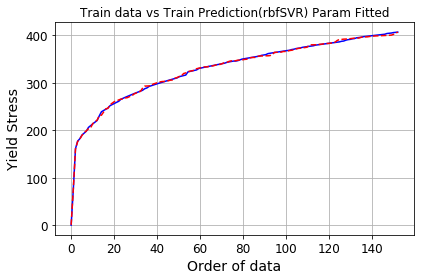

In [133]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
ys_train_sort = np.sort(ys_train, axis=None)
ys_rbfSVR_train_predictions_sort= np.sort(ys_rbfSVR_train_predictions, axis=None)
plt.plot(xx,ys_train_sort,"b-", xx, ys_rbfSVR_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(rbfSVR) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_2V_rbfSVR_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_2V_rbfSVR_ParamFitted


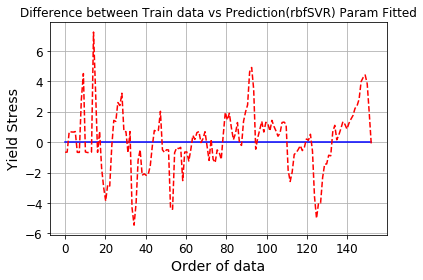

In [134]:
# Difference of train data
difference = ys_train_sort - ys_rbfSVR_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(rbfSVR) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_2V_rbfSVR_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_2V_rbfSVR_ParamFitted


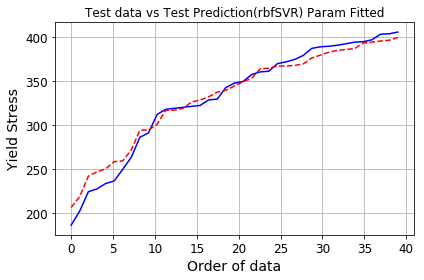

In [135]:
# Difference of test data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
ys_test_sort = np.sort(ys_test, axis=None)
ys_rbfSVM_test_predictions_sort= np.sort(ys_rbfSVM_test_predictions, axis=None)
plt.plot(xx,ys_test_sort,"b-", xx, ys_rbfSVM_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(rbfSVR) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_2V_rbfSVR_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_2V_rbfSVR_ParamFitted


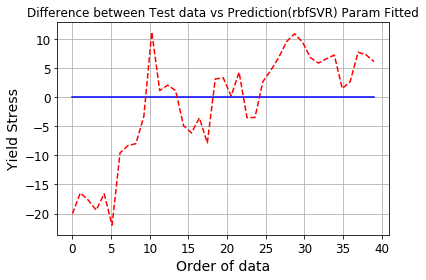

In [136]:
# Difference of test data
difference = ys_test_sort - ys_rbfSVM_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(rbfSVR) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_2V_rbfSVR_ParamFitted")


## Extracting files

In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM fiels to local
files.download('images/BestHyperParameter/SV_Regression/yield_stress_2V/TrainPrediction_with_2V_rbfSVR_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/SV_Regression/yield_stress_2V/TestPrediction_with_2V_rbfSVR_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/SV_Regression/yield_stress_2V/Difference_between_Train_data_vs_Prediction_2V_rbfSVR_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/SV_Regression/yield_stress_2V/Difference_between_Test_data_vs_Prediction_2V_rbfSVR_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/rbfSVR/rbfSVR_2V.txt')

In [141]:
import os
print(os.getcwd())
print(os.listdir())

/content
['.config', 'images', '3MA_data.csv', 'gdrive', 'sample_data']


#### elongation